In [56]:
from pathlib import Path
import pickle
from rich import print
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

stats_path = Path("stats")

In [57]:
def read_stats(path):
    databytes = path.read_bytes()
    stats = pickle.loads(databytes)
    return stats

In [58]:
stats_data = {}
diario = {}

In [59]:
for stats in stats_path.glob("*.pydat"):
    data = read_stats(stats)
    for name, items in data.items():
        remover = []
        for i,item in enumerate(items):
            if item["analisis"] == "date":
                nombre  = item["nombre"]
                if nombre not in diario:
                    diario[nombre] = []
                diario[nombre].append(item)
                remover.append(item)
        for r in remover:            
            items.remove(r)
        stats_data.update(data)

In [60]:

print(len(stats_data))
dataset = []
for elem,data in stats_data.items():
    dataset += data
    
df = pd.DataFrame(dataset)

df.assign(tipo_bin=lambda x:2**x.tipo)
print(df.size)
df.head(100)

601

95242

nombre  tipo        analisis        llave         media       dev_std  \
0   STA.LUISA     1       temporada     invierno   6661.698887  13118.326468   
1   STA.LUISA     1       temporada    primavera  10984.581910  19972.298583   
2   STA.LUISA     1       temporada       verano   6991.007594  13669.850588   
3   STA.LUISA     1          diario      feriado   9505.012717  15700.717656   
4   STA.LUISA     1          diario      laboral   7625.365729  14967.928524   
..        ...   ...             ...          ...           ...           ...   
95     LAVEGA     4  bloque_horario       mañana  -1208.217671   1778.931348   
96     LAVEGA     4  bloque_horario        noche   -936.673895   1400.829690   
97     LAVEGA     4  bloque_horario        tarde  -1283.102999   1852.955686   
98     LAVEGA     4  bloque_horario  tarde-noche  -1410.152879   2019.758210   
99     LAVEGA     6       temporada     invierno    867.888420   2925.751825   

         median  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
..          ...  
95     0.000000  
96     0.000000  
97     0.000000  
98     0.000000  
99  2084.668799  

[100 rows x 7 columns]

In [69]:
def read_stats(filtro=[]):
    stats_data = {}
    diario = {}    
    for stats in stats_path.glob("*.pydat"):
        data = read_stats(stats)
        for name, items in data.items():
            remover = []
            for i,item in enumerate(items):
                if item["analisis"] == "date":
                    nombre  = item["nombre"]
                    if nombre not in diario:
                        diario[nombre] = []
                    diario[nombre].append(item)
                    remover.append(item)
            for r in remover:            
                items.remove(r)
            stats_data.update(data)    
    dataset = []
    for elem,data in stats_data.items():
        dataset += data

    df = pd.DataFrame(dataset)
    if fitro:
        return df[df["nombre"].isin(filtro)]
    return df

In [68]:
df[df["nombre"].isin(["LAVEGA","PURRANQUE"])]

nombre  tipo        analisis        llave        media      dev_std  \
72       LAVEGA     1       temporada     invierno   260.137463   644.844113   
73       LAVEGA     1       temporada    primavera   531.251894  1031.317303   
74       LAVEGA     1       temporada       verano   417.807166   891.122441   
75       LAVEGA     1          diario      feriado    -2.688724     2.722006   
76       LAVEGA     1          diario      laboral   401.055577   871.438997   
...         ...   ...             ...          ...          ...          ...   
5575  PURRANQUE     6          diario      laboral   945.714441  6432.944917   
5576  PURRANQUE     6  bloque_horario       mañana   972.984688  6583.335155   
5577  PURRANQUE     6  bloque_horario        noche   828.991806  5577.233939   
5578  PURRANQUE     6  bloque_horario        tarde  1058.025954  7155.345451   
5579  PURRANQUE     6  bloque_horario  tarde-noche  1012.402875  6949.460034   

         median  
72       0.0000  
73       0.0000  
74       0.0000  
75      -2.3365  
76       0.0000  
...         ...  
5575  4613.1330  
5576  4988.2535  
5577  4211.7520  
5578  5764.4350  
5579  5910.8120  

[63 rows x 7 columns]

In [7]:
df.head()

nombre  tipo   analisis      llave         media       dev_std  median
0  STA.LUISA     1  temporada   invierno   6661.698887  13118.326468     0.0
1  STA.LUISA     1  temporada  primavera  10984.581910  19972.298583     0.0
2  STA.LUISA     1  temporada     verano   6991.007594  13669.850588     0.0
3  STA.LUISA     1     diario    feriado   9505.012717  15700.717656     0.0
4  STA.LUISA     1     diario    laboral   7625.365729  14967.928524     0.0

In [8]:
def item_stats(data):
    means =[m["media"] for m in data]
    dev = [m["dev_std"] for m in data]
    example = data.pop()
    mean = np.mean(means)
    dev_std_means = np.std(means)
    max_dev = max(dev)
    dev_estimada = .6 * dev_std_means + .4 * max_dev
    example.update({"media":mean,"dev_std":dev_estimada,"llave":"daily_stats"})
    return example


In [9]:
dates_stats = []
from itertools import groupby

for station, datadate in diario.items():
    dd_ord = sorted(datadate, key=lambda e:e["tipo"])
    for tipo, group in groupby(dd_ord, key=lambda e:e["tipo"]):
        item = item_stats(list(group))
        dates_stats.append(item)

In [10]:
df_dates = pd.DataFrame(dates_stats)
df_dates.head()

nombre  tipo analisis        llave         media       dev_std  \
0  STA.LUISA     1     date  daily_stats   7028.840350  16522.757458   
1  STA.LUISA     6     date  daily_stats -24151.890036  33121.169762   
2    NEGRETE     1     date  daily_stats   1665.972257   4637.076087   
3    NEGRETE     3     date  daily_stats    -47.400651     66.721089   
4    NEGRETE     4     date  daily_stats   -830.688378   1272.497471   

      median  
0  12760.965  
1 -94984.444  
2    311.822  
3     -0.480  
4      0.000

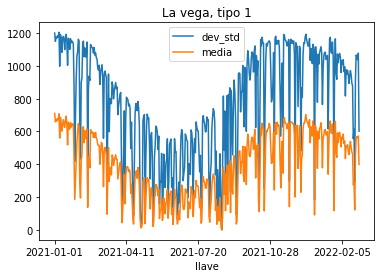

In [11]:
one_station =pd.DataFrame(diario["LAVEGA"])
one_station[one_station["tipo"]==1].plot(x="llave",y=["dev_std","media"], title="La vega, tipo 1")
plt.savefig("serie-time-lavega-tipo1.png")

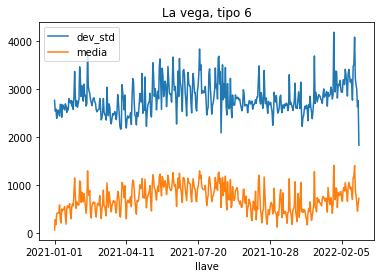

In [12]:
one_station[one_station["tipo"]==6].plot(x="llave",y=["dev_std","media"], title="La vega, tipo 6")
plt.savefig("serie-time-lavega-tipo6.png")

Análisis de convergencia de 'media' y 'dev_std' para un mismo bloque.


In [13]:
bloque = df.loc[(df["analisis"]=="temporada") & (df["tipo"]==3) & (df["llave"]=="invierno")]

<AxesSubplot:xlabel='media', ylabel='dev_std'>

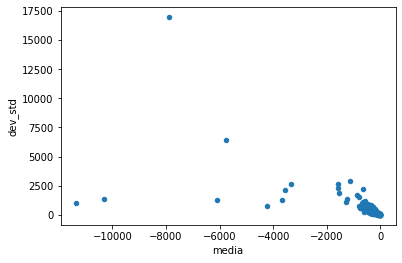

In [14]:
bloque.plot.scatter(x="media", y="dev_std", colormap='viridis')

<AxesSubplot:xlabel='media', ylabel='dev_std'>

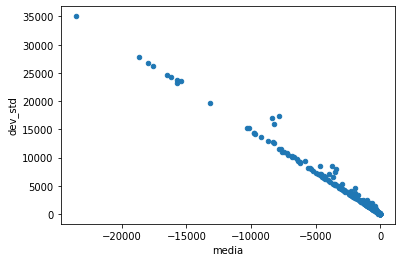

In [15]:
bloque = df.loc[(df["analisis"]=="temporada") & (df["tipo"]==4) & (df["llave"]=="invierno")]
bloque.plot.scatter(x="media", y="dev_std", colormap='viridis')

<AxesSubplot:xlabel='media', ylabel='dev_std'>

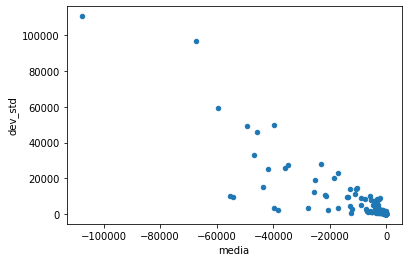

In [16]:
bloque = df.loc[(df["analisis"]=="temporada") & (df["tipo"]==2) & (df["llave"]=="invierno")]
bloque.plot.scatter(x="media", y="dev_std", colormap='viridis')

In [17]:
data = pd.concat([df,df_dates])
data.head()


nombre  tipo   analisis      llave         media       dev_std  median
0  STA.LUISA     1  temporada   invierno   6661.698887  13118.326468     0.0
1  STA.LUISA     1  temporada  primavera  10984.581910  19972.298583     0.0
2  STA.LUISA     1  temporada     verano   6991.007594  13669.850588     0.0
3  STA.LUISA     1     diario    feriado   9505.012717  15700.717656     0.0
4  STA.LUISA     1     diario    laboral   7625.365729  14967.928524     0.0

In [18]:
sta_luisa = bloque.loc[(bloque["nombre"] == "LAVEGA")]

In [19]:
sta_luisa.head()

Empty DataFrame
Columns: [nombre, tipo, analisis, llave, media, dev_std, median]
Index: []

In [20]:
data.columns

Index(['nombre', 'tipo', 'analisis', 'llave', 'media', 'dev_std', 'median'], dtype='object')

Se definen las clases con valoraciones numéricas 'onehot'

In [21]:
analisis = {v:2**i for i,v in enumerate(set(data["analisis"]))}
llaves = {v:2**i for i,v in enumerate(set(data["llave"]))}

print(analisis, llaves)

{'bloque_horario': 1, 'diario': 2, 'temporada': 4, 'date': 8}
{
    'feriado': 1,
    'tarde-noche': 2,
    'invierno': 4,
    'verano': 8,
    'mañana': 16,
    'primavera': 32,
    'daily_stats': 64,
    'laboral': 128,
    'noche': 256,
    'tarde': 512
}

In [22]:

data["analisis_value"] = data["analisis"].apply(lambda e: analisis[e])
data["llave_value"] = data["llave"].apply(lambda e: llaves[e])

print(data.shape)
data.head()

(15126, 9)

nombre  tipo   analisis      llave         media       dev_std  median  \
0  STA.LUISA     1  temporada   invierno   6661.698887  13118.326468     0.0   
1  STA.LUISA     1  temporada  primavera  10984.581910  19972.298583     0.0   
2  STA.LUISA     1  temporada     verano   6991.007594  13669.850588     0.0   
3  STA.LUISA     1     diario    feriado   9505.012717  15700.717656     0.0   
4  STA.LUISA     1     diario    laboral   7625.365729  14967.928524     0.0   

   analisis_value  llave_value  
0               4            4  
1               4           32  
2               4            8  
3               2            1  
4               2          128

In [23]:
path = Path("data_stats.pydat")
databytes = pickle.dumps(data)
path.write_bytes(databytes)

1106524

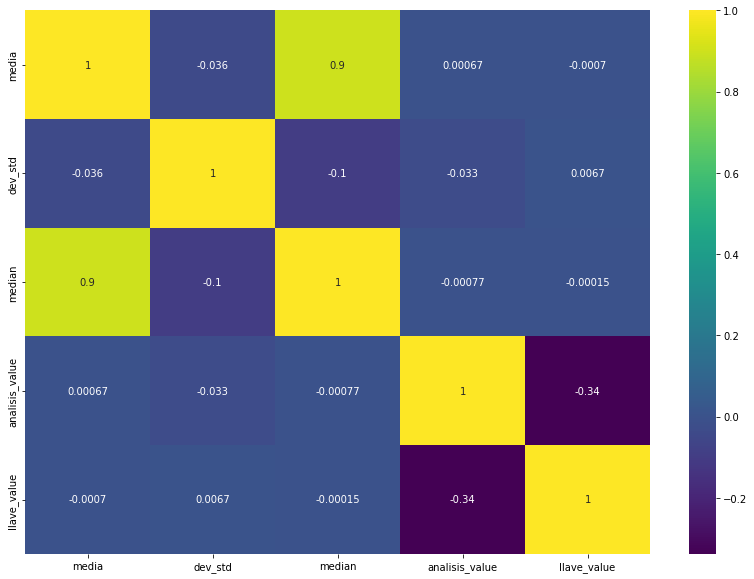

In [30]:
features = data[["media","dev_std","median", "analisis_value","llave_value"]]

plt.figure(figsize=(14, 10))
sns.heatmap(features.corr(), cmap='viridis', annot=True);
plt.savefig("map_calor_stats.png")

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = features.to_numpy()

## clase para cada instancia anterior
y = data.tipo    


partitions = [i for i in np.linspace(.1,.9, 20)]
classifiers_dt = {}

for p in partitions:
    data_clf = {"name":"Decision Tree"}
    clf = DecisionTreeClassifier()
    classifiers_dt[p] = data_clf
    data_clf["classifier"] = clf
    ## datos, caracteristicas o features 
    X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y, 
            test_size=p, 
            random_state=2,
            stratify=y)

    # .... COMPLETE ACA
    clf.fit(X_train,y_train) #entrenamos el clasificador
    y_pred = clf.predict(X_test) #se testean los datos (overfiting)
    data_clf["score"] = accuracy_score(y_test,y_pred)
    data_clf["report"] = classification_report(y_test,y_pred)
    data_clf["partition"] = p
    classifiers_dt[p] = data_clf

In [32]:
max(classifiers_dt.values(), key=lambda e:e["score"])

{'name': 'Decision Tree',
 'classifier': DecisionTreeClassifier(),
 'score': 0.8995373430270985,
 'report': '              precision    recall  f1-score   support\n\n           1       0.89      0.89      0.89       278\n           2       0.75      0.65      0.70       118\n           3       0.88      0.89      0.89       240\n           4       0.97      0.94      0.95       280\n           6       0.91      0.94      0.92       597\n\n    accuracy                           0.90      1513\n   macro avg       0.88      0.86      0.87      1513\nweighted avg       0.90      0.90      0.90      1513\n',
 'partition': 0.1}

In [33]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=.3, 
        random_state=2,
        stratify=y)

# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)



/home/david/.virtualenvs3.9.9/mineraia/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/david/.virtualenvs3.9.9/mineraia/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/david/.virtualenvs3.9.9/mineraia/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/david/.virtualenvs3.9.9/mineraia/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Valor óptimo de n_estimators: 146

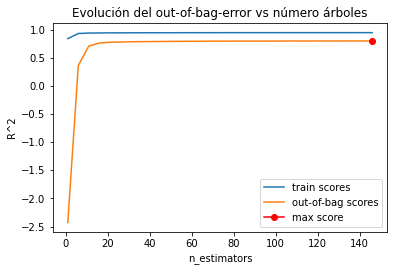

In [29]:
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
plt.savefig("estimacion.png")
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")


Según esta regresión el número de estimadores no debería ser menor a 40.


In [34]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    

Valor óptimo de n_estimators: 146

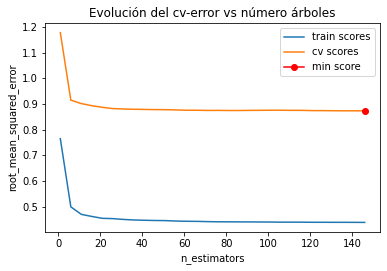

In [35]:
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
plt.savefig("evolucion-cv-num-arboles.png")

print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")


In [36]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    


Valor óptimo de max_features: 4

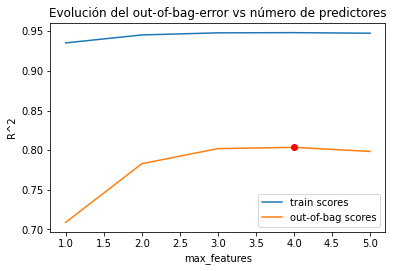

In [37]:
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
plt.savefig("cantidad-caracteristica.png")

print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

In [38]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train, y_train)
    predicciones = modelo.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    


Valor óptimo de max_features: 3

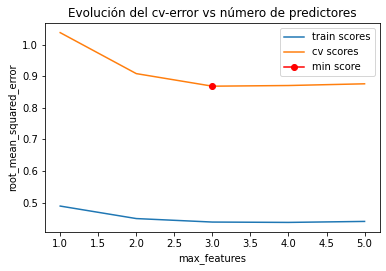

In [39]:
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
plt.savefig("cantidad-caracteristica-cross-validation.png")

ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [40]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

params =  {'n_estimators': 50,
            'max_features': 4,
            'max_depth'   : 15,
            'criterion'   : 'gini'
}

classifiers = {}
start = p
for p in partitions:    
    data_clf={"name":"Random Forest Classifier","partition":p}
    classifiers[start+p] = data_clf    
    clf = RandomForestClassifier(random_state=0,**params)
    X_train, X_test, y_train, y_test = train_test_split(
            X, 
            y, 
            test_size=p, 
            random_state=2,
            stratify=y)    
    data_clf["classifier"] = clf    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) #se testean los datos (overfiting)
    data_clf["score"] = accuracy_score(y_test,y_pred)
    data_clf["report"] = classification_report(y_test,y_pred)

In [41]:
print(classifiers)

{
    1.0: {
        'name': 'Random Forest Classifier',
        'partition': 0.1,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9312623925974884,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.93      0.92      0.92       278\n           2       0.85      0.74      0.79       118\n  
3       0.93      0.94      0.94       240\n           4       0.96      0.96      0.96      
280\n           6       0.93      0.96      0.95       597\n\n    accuracy                   
0.93      1513\n   macro avg       0.92      0.90      0.91      1513\nweighted avg       
0.93      0.93      0.93      1513\n'
    },
    1.0421052631578949: {
        'name': 'Random Forest Classifier',
        'partition': 0.14210526315789473,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9213953488372093,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.92      0.93      0.93       395\n           2       0.78      0.69      0.73       167\n  
3       0.93      0.92      0.93       341\n           4       0.93      0.94      0.94      
398\n           6       0.94      0.95      0.94       849\n\n    accuracy                   
0.92      2150\n   macro avg       0.90      0.89      0.89      2150\nweighted avg       
0.92      0.92      0.92      2150\n'
    },
    1.0842105263157895: {
        'name': 'Random Forest Classifier',
        'partition': 0.1842105263157895,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9135270900609975,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.91      0.91      0.91       512\n           2       0.78      0.68      0.73       217\n  
3       0.92      0.92      0.92       442\n           4       0.93      0.95      0.94      
516\n           6       0.93      0.95      0.94      1100\n\n    accuracy                   
0.91      2787\n   macro avg       0.89      0.88      0.89      2787\nweighted avg       
0.91      0.91      0.91      2787\n'
    },
    1.1263157894736842: {
        'name': 'Random Forest Classifier',
        'partition': 0.22631578947368422,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9179322429906542,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.91      0.92      0.91       629\n           2       0.81      0.71      0.75       266\n  
3       0.92      0.92      0.92       543\n           4       0.93      0.94      0.94      
634\n           6       0.93      0.95      0.94      1352\n\n    accuracy                   
0.92      3424\n   macro avg       0.90      0.89      0.89      3424\nweighted avg       
0.92      0.92      0.92      3424\n'
    },
    1.168421052631579: {
        'name': 'Random Forest Classifier',
        'partition': 0.26842105263157895,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9113518837724698,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.91      0.90      0.90       746\n           2       0.79      0.69      0.73       316\n  
3       0.92      0.92      0.92       644\n           4       0.93      0.94      0.93      
751\n           6       0.92      0.95      0.93      1604\n\n    accuracy                   
0.91      4061\n   macro avg       0.89      0.88      0.88      4061\nweighted avg       
0.91      0.91      0.91      4061\n'
    },
    1.2105263157894737: {
        'name': 'Random Forest Classifie

In [49]:
classificador = max(classifiers.values(), key=lambda e:e["score"])
print(classificador)

databytes = pickle.dumps(classificador)
class_base = Path()

{
    'name': 'Random Forest Classifier',
    'partition': 0.1,
    'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
    'score': 0.9312623925974884,
    'report': '              precision    recall  f1-score   support\n\n           1       
0.93      0.92      0.92       278\n           2       0.85      0.74      0.79       118\n  
3       0.93      0.94      0.94       240\n           4       0.96      0.96      0.96      
280\n           6       0.93      0.96      0.95       597\n\n    accuracy                   
0.93      1513\n   macro avg       0.92      0.90      0.91      1513\nweighted avg       
0.93      0.93      0.93      1513\n'
}

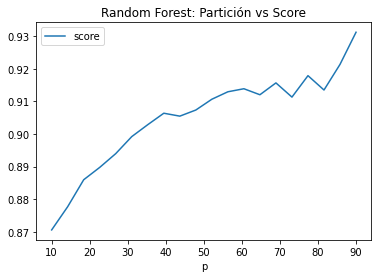

In [42]:
values = [{"p":(1-r["partition"])*100,"score":r["score"]} for k,r in classifiers.items()]
df = pd.DataFrame(values)
df.plot(x="p", y="score", title="Random Forest: Partición vs Score")
plt.savefig("score-random-forest-vs-partition.png")

In [43]:
print(data_clf)

{
    'name': 'Random Forest Classifier',
    'partition': 0.9,
    'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
    'score': 0.8705744086969296,
    'report': '              precision    recall  f1-score   support\n\n           1       
0.86      0.88      0.87      2501\n           2       0.65      0.48      0.55      1059\n  
3       0.86      0.90      0.88      2159\n           4       0.88      0.91      0.89      
2519\n           6       0.91      0.91      0.91      5376\n\n    accuracy                  
0.87     13614\n   macro avg       0.83      0.82      0.82     13614\nweighted avg       
0.87      0.87      0.87     13614\n'
}

In [44]:
print(classifiers)

{
    1.0: {
        'name': 'Random Forest Classifier',
        'partition': 0.1,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9312623925974884,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.93      0.92      0.92       278\n           2       0.85      0.74      0.79       118\n  
3       0.93      0.94      0.94       240\n           4       0.96      0.96      0.96      
280\n           6       0.93      0.96      0.95       597\n\n    accuracy                   
0.93      1513\n   macro avg       0.92      0.90      0.91      1513\nweighted avg       
0.93      0.93      0.93      1513\n'
    },
    1.0421052631578949: {
        'name': 'Random Forest Classifier',
        'partition': 0.14210526315789473,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9213953488372093,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.92      0.93      0.93       395\n           2       0.78      0.69      0.73       167\n  
3       0.93      0.92      0.93       341\n           4       0.93      0.94      0.94      
398\n           6       0.94      0.95      0.94       849\n\n    accuracy                   
0.92      2150\n   macro avg       0.90      0.89      0.89      2150\nweighted avg       
0.92      0.92      0.92      2150\n'
    },
    1.0842105263157895: {
        'name': 'Random Forest Classifier',
        'partition': 0.1842105263157895,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9135270900609975,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.91      0.91      0.91       512\n           2       0.78      0.68      0.73       217\n  
3       0.92      0.92      0.92       442\n           4       0.93      0.95      0.94      
516\n           6       0.93      0.95      0.94      1100\n\n    accuracy                   
0.91      2787\n   macro avg       0.89      0.88      0.89      2787\nweighted avg       
0.91      0.91      0.91      2787\n'
    },
    1.1263157894736842: {
        'name': 'Random Forest Classifier',
        'partition': 0.22631578947368422,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9179322429906542,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.91      0.92      0.91       629\n           2       0.81      0.71      0.75       266\n  
3       0.92      0.92      0.92       543\n           4       0.93      0.94      0.94      
634\n           6       0.93      0.95      0.94      1352\n\n    accuracy                   
0.92      3424\n   macro avg       0.90      0.89      0.89      3424\nweighted avg       
0.92      0.92      0.92      3424\n'
    },
    1.168421052631579: {
        'name': 'Random Forest Classifier',
        'partition': 0.26842105263157895,
        'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
        'score': 0.9113518837724698,
        'report': '              precision    recall  f1-score   support\n\n           1     
0.91      0.90      0.90       746\n           2       0.79      0.69      0.73       316\n  
3       0.92      0.92      0.92       644\n           4       0.93      0.94      0.93      
751\n           6       0.92      0.95      0.93      1604\n\n    accuracy                   
0.91      4061\n   macro avg       0.89      0.88      0.88      4061\nweighted avg       
0.91      0.91      0.91      4061\n'
    },
    1.2105263157894737: {
        'name': 'Random Forest Classifie

In [70]:
classifier=max(classifiers.values(), key=lambda e:e["score"])

In [72]:
print(classifier)
path = Path("analisis_local/clasificador.pydat")
databytes = pickle.dumps(classifier)
path.write_bytes(databytes)

{
    'name': 'Random Forest Classifier',
    'partition': 0.1,
    'classifier': RandomForestClassifier(max_depth=15, max_features=4, n_estimators=50,
                       random_state=0),
    'score': 0.9312623925974884,
    'report': '              precision    recall  f1-score   support\n\n           1       
0.93      0.92      0.92       278\n           2       0.85      0.74      0.79       118\n  
3       0.93      0.94      0.94       240\n           4       0.96      0.96      0.96      
280\n           6       0.93      0.96      0.95       597\n\n    accuracy                   
0.93      1513\n   macro avg       0.92      0.90      0.91      1513\nweighted avg       
0.93      0.93      0.93      1513\n'
}

6715336

In [46]:
print(y_pred.shape, y_test.shape)


(13614,)
(13614,)

1109624

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
X = data[["tipo","media","dev_std", "analisis_value", "llave_value"]].to_numpy()


clusters = list(range(1, 15))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(X)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.savefig("analisis_inercial.png")
plt.show()

In [ ]:
Se escpgem 6 clusters, ya que a  partir de ahí el sse tiene la pendeinte za a disminuir en menos de un 20% por cada cluster adicional que se agrega

In [ ]:
data.head()

In [ ]:
select = data[["media","dev_std","tipo"]]

In [ ]:
sns.scatterplot(x=select["media"],y=select["dev_std"], hue=select["tipo"])

In [ ]:
kmeans_three = KMeans(n_clusters=6, random_state = 20).fit(X)
plt.figure(figsize=(14, 10))
plt.scatter(X[:, 1], X[:, 2], c=kmeans_three.labels_)
sns.scatterplot(x=select["media"],y=select["dev_std"], hue=select["tipo"],  palette="deep", alpha=0.5)
plt.title("K-Means para 3 clusters")
plt.savefig("kmeas_cluser_n6_comparador.png")
plt.show()

In [ ]:
kmeans_three = KMeans(n_clusters=6, random_state = 20).fit(X)
plt.scatter(X[:, 1], X[:, 2], c=kmeans_three.labels_)
plt.title("K-Means para 3 clusters")
plt.savefig("selector_kmeans_6.png")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

eps = 0.8
min_samples = 1000

dbscan_one = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,1], X[:,2], c=dbscan_one.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

In [ ]:
#Respuesta
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

nbrs = NearestNeighbors(n_neighbors=6).fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.46, color='r', linestyle='--') #Ajuste el valor para y
plt.plot(distances)

In [ ]:
eps = 450
min_samples = 70

dbscan_two = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
plt.scatter(X[:,1], X[:,2], c=dbscan_two.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=5)
pca.fit(X)


print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(data[["media","dev_std", "analisis_value", "llave_value"]])

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']



In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = ["media","dev_std", "analisis_value", "llave_value"],
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)




In [ ]:
modelo = LinearRegression(normalize=True)
modelo.fit(X = X_train, y = y_train)

In [ ]:
cols=["media","dev_std", "analisis_value", "llave_value"]


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 12))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(cols)), cols)
plt.xticks(range(len(cols)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

modelo = LinearRegression(normalize=True)
X = data[["media","dev_std", "analisis_value", "llave_value"]].to_numpy()
y  = data[["tipo"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=.30, 
        random_state=2,
        stratify=y)
lr_pipe = make_pipeline(StandardScaler(), LinearRegression())
lr_pipe.fit(X = X_train, y = y_train)

In [ ]:
def infobarras():
    path = Path("info_barras_geo.pydat")
    databytes = path.read_bytes()
    data = pickle.loads(databytes)
    return data

infobarras = infobarras()

In [ ]:
for index,row in list(data.iterrows())[0:10]:
    n = row["nombre"]
    key =  f"S/E {n}"
    elem = {k for k in infobarras.keys() if "LUISA" in k}


In [ ]:
from rich import print

print(infobarras["S/E SANTA LUISA"])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

y_red = clf.predict(X_test)

In [ ]:
print( "Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=200).fit(X,y)
gpc.score(X,y)
